# SmartTemplateAnalysisScatterDensityPlotsBygroup

In [1]:
%matplotlib inline
import math
import itertools
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
pre = pd.read_csv('TrainingSetNoMissingValue.csv')
post = pd.read_csv('TrainingSetcorretto.csv')
pre["PurchDate"] = pre["PurchDate"].astype("datetime64")
post["PurchDate"] = post["PurchDate"].astype("datetime64")

#Variabile categorica rispetto alla quela effettuare l'analisi
VarGroup='IsBadBuy'

#Set dei titoli relativi ai plot delle variabili ('Meglio non cambiarli')
RealTitle='ScatterPlot '
additional1=' pre'
additional2=' post'

#variabile che definisce la presenza di un confroto
comp=True

#variabile per creare i density plot standard analysis (Computationally expensive)
#if you want to try this on the full dataset set SamplePre=pre and SamplePost=post
density=True
def Sample_df(x):
    return x.sample(frac=0.2, replace=True, random_state=1)
SamplePre= pre.groupby([pre['Model'], pre['SubModel'], pre['VehYear']]).apply(Sample_df)
SamplePost= post.groupby([post['Model'], post['SubModel'], post['VehYear']]).apply(Sample_df)

#variabili per fare analisi avanzate
advanced=True
hexPlot=True
densityByVarGroup=True

#Seconda variabile di raggruppamento
densityBy2VarGroup=False
VarGroup2='TopThreeAmericanName'

#SetupScatters
size=0.1
alpha=1

#Just to remember them
categories=['IsBadBuy', 'Auction', 'Make', 'Engine', 'Trim', 'SubModelSpecifics', 'Color', 'Transmission', 
            'WheelTypeID', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART',
            'BYRNO', 'VNZIP1', 'VNST', 'IsOnlineSale', 'Model', 'Wheeldrives', 'Doors', 'SubModel']

#listaVariabiliNumeriche (Just to remember them)
num_catProp=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 
         'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
         'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
         'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','VehBCost','WarrantyCost','VehOdo']


#listaVariabiliNumeriche utilizzate nell'analisi
num_catProp=['MMRAcquisitionAuctionAveragePrice','VehBCost','WarrantyCost','VehOdo']

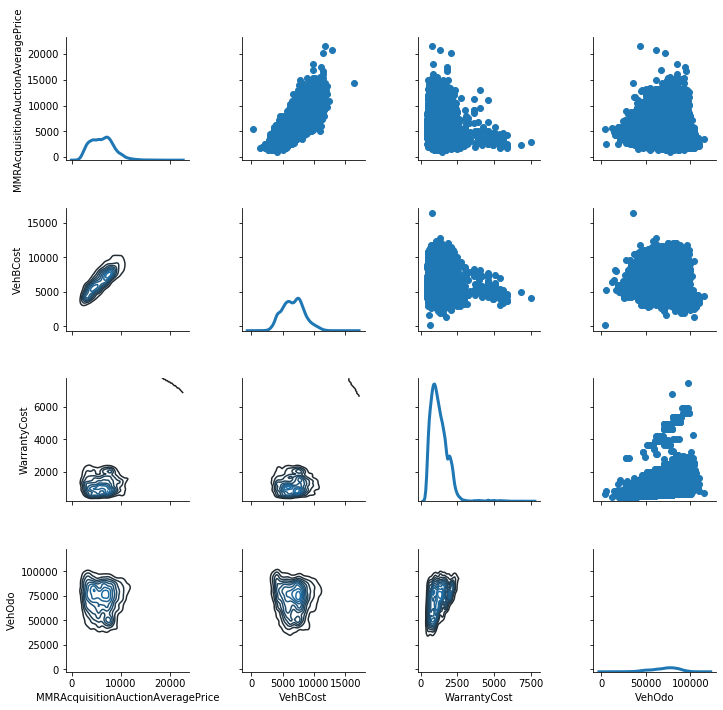

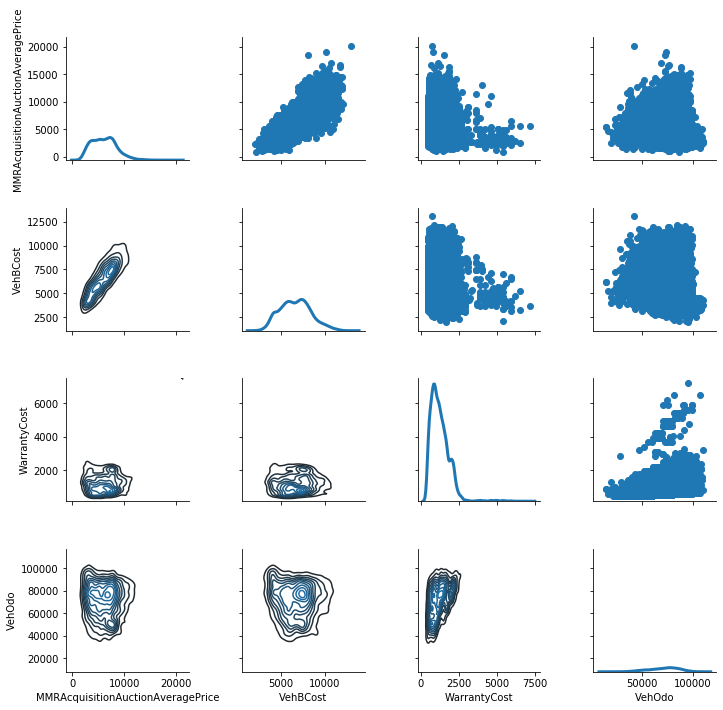

In [3]:
if density:
    analysis=SamplePre[num_catProp].dropna()
    g = sns.PairGrid(analysis)
    g.map_upper(plt.scatter)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False);
    plt.show()
    
    if comp:
        analysis=SamplePost[num_catProp].dropna()
        g = sns.PairGrid(analysis)
        g.map_upper(plt.scatter)
        g.map_lower(sns.kdeplot)
        g.map_diag(sns.kdeplot, lw=3, legend=False);
        plt.show()

# CreazioneScatterPlot

MMRAcquisitionAuctionAveragePrice vs VehBCost
FullScatter


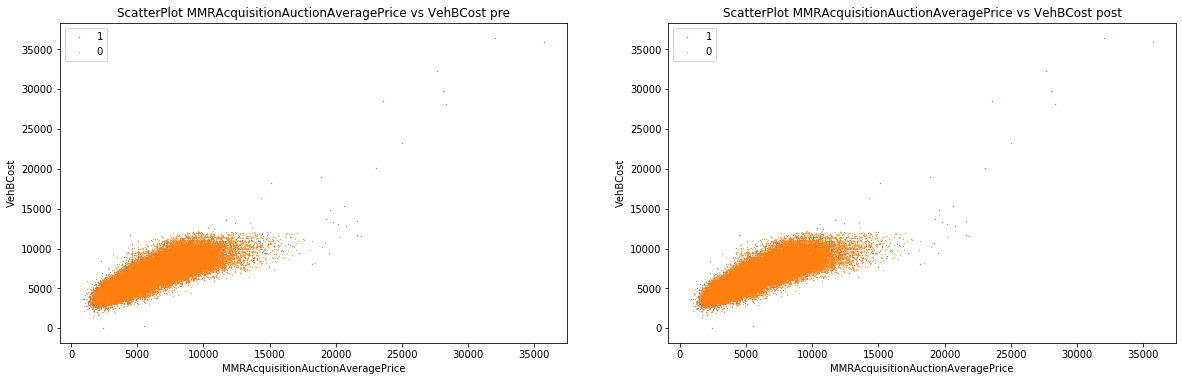

DensityScatter


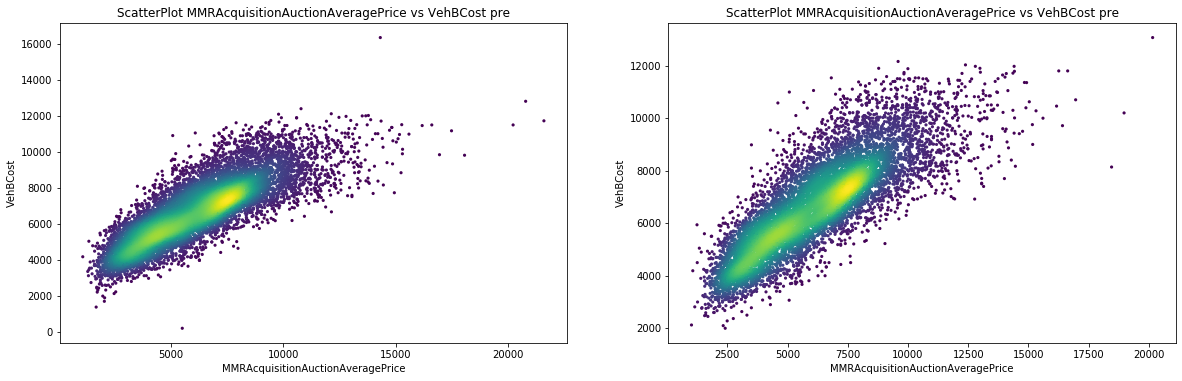






MMRAcquisitionAuctionAveragePrice vs WarrantyCost
FullScatter


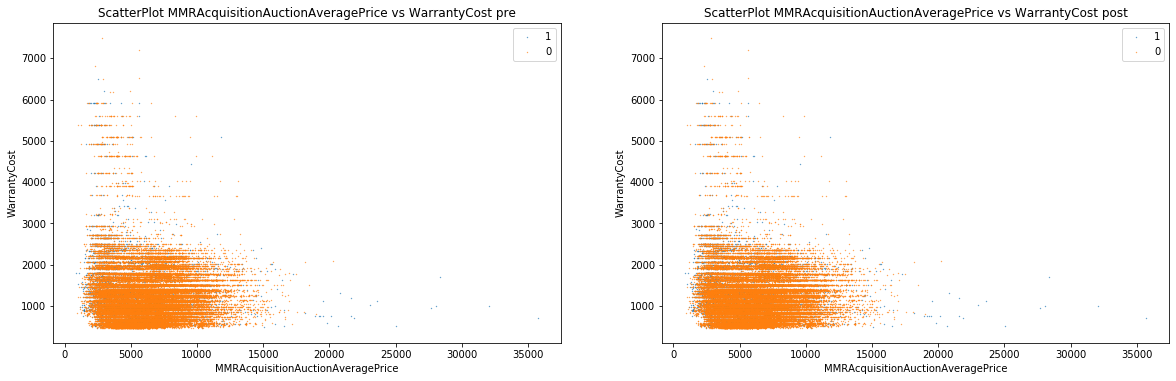

DensityScatter


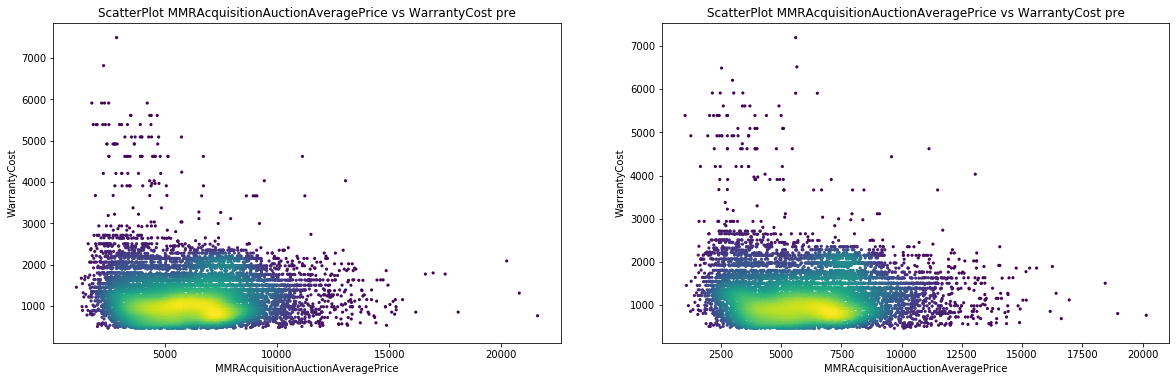






MMRAcquisitionAuctionAveragePrice vs VehOdo
FullScatter


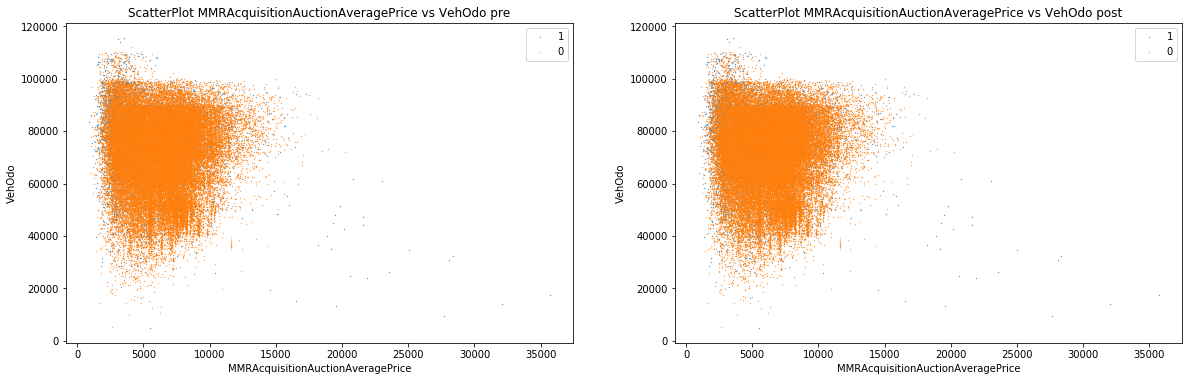

DensityScatter


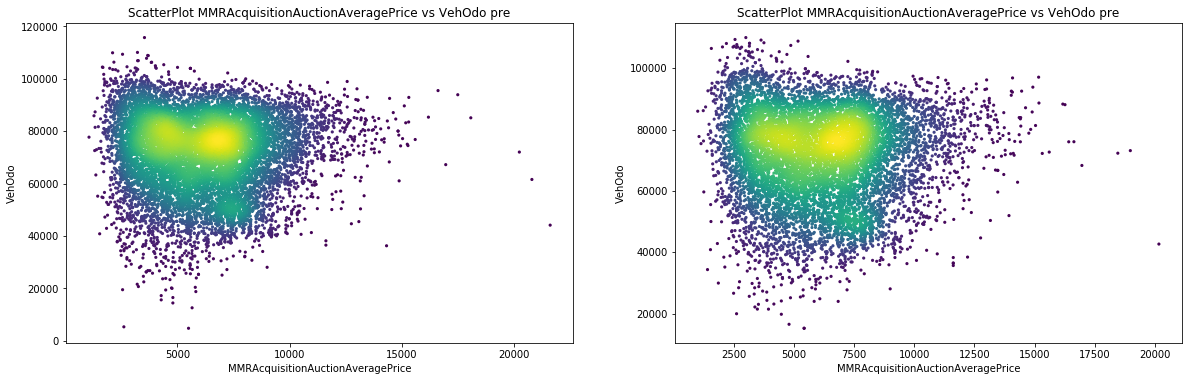






VehBCost vs WarrantyCost
FullScatter


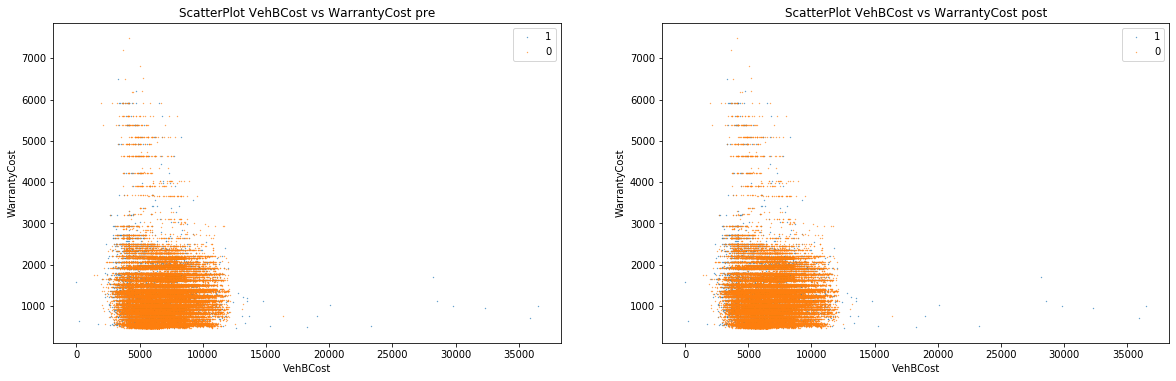

DensityScatter


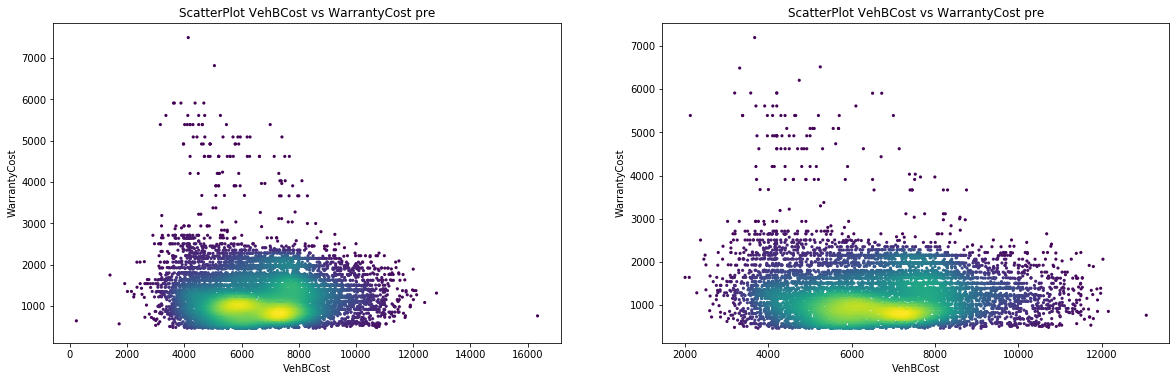






VehBCost vs VehOdo
FullScatter


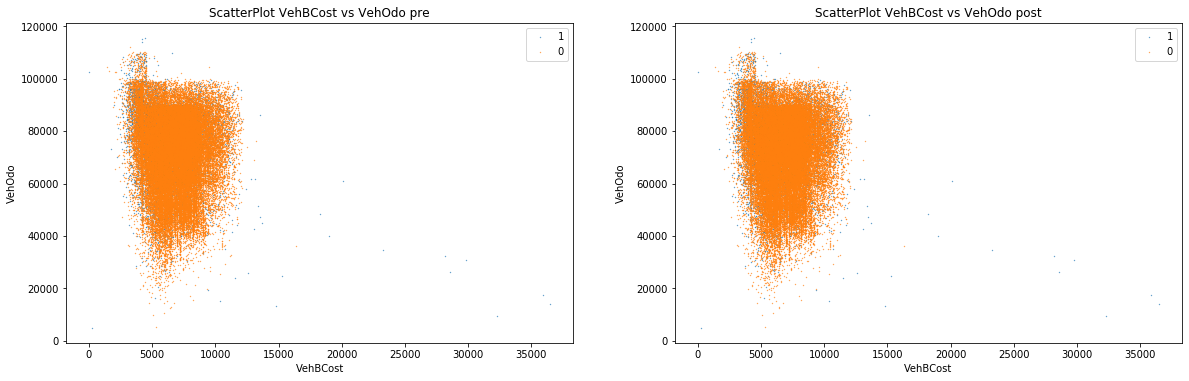

DensityScatter


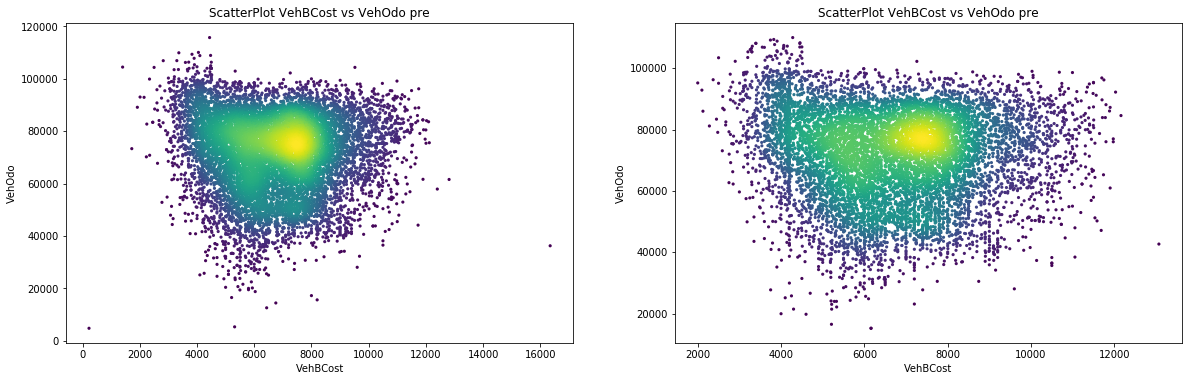






WarrantyCost vs VehOdo
FullScatter


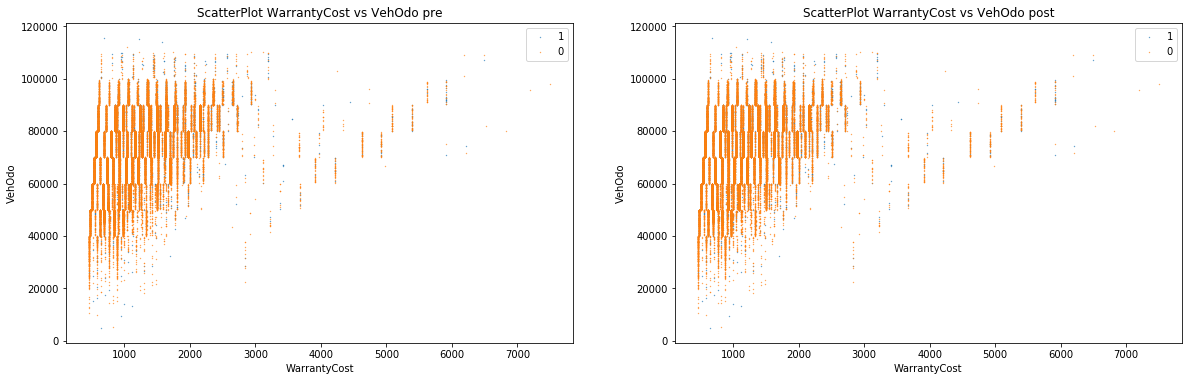

DensityScatter


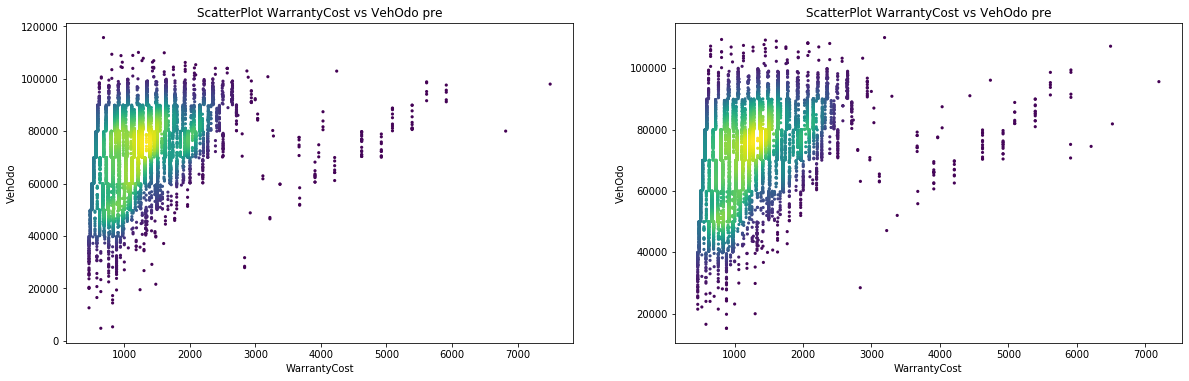

In [4]:
couples=itertools.combinations(num_catProp, 2)
for Variable1, Variable2 in couples:
    if Variable1 in pre.columns and Variable2 in pre.columns:
        
        compare= comp and Variable1 in post.columns and Variable2 in post.columns
        print(Variable1+str(' vs ')+Variable2)
        
        title1=RealTitle+Variable1+str(' vs ')+Variable2   
        
        print('FullScatter')
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        # Plot old Distribution
        listUnique=list(pre[VarGroup].unique())
        ax1=plt.subplot2grid(fig_dims, (0, 0), title=title1+additional1, xlabel=Variable1, ylabel=Variable2)
        for value in listUnique:   
            plt.scatter(pre[pre[VarGroup] == value][Variable1], 
                pre[pre[VarGroup] == value][Variable2], label=value, s=size, alpha=alpha)        

        ax1.legend()

        # Plot new Distribution
        if compare:
            listUnique=list(pre[VarGroup].unique())
            ax2=plt.subplot2grid(fig_dims, (0, 1), title=title1+additional2, xlabel=Variable1, ylabel=Variable2)
            for value in listUnique:   
                plt.scatter(pre[pre[VarGroup] == value][Variable1], 
                    pre[pre[VarGroup] == value][Variable2], label=value, s=size, alpha=alpha)        

            ax2.legend()

        plt.show()
        
        
        if density:
            print('DensityScatter')
            # Set up a grid of plots
            fig = plt.figure(figsize=(20, 20)) 
            fig_dims = (3, 2)
            
            tmpPre=SamplePre[[Variable1,Variable2]].dropna()
            
            x = tmpPre[Variable1].dropna().to_numpy()
            y = tmpPre[Variable2].dropna().to_numpy()

            xy = np.vstack([x,y])
            z = stats.gaussian_kde(xy)(xy)

            idx = z.argsort()
            x, y, z = x[idx], y[idx], z[idx]

            # Set up a grid of plots
            ax1=plt.subplot2grid(fig_dims, (0, 0), title=title1+additional1, xlabel=Variable1, ylabel=Variable2)
            ax1.scatter(x, y, c=z, s=10, edgecolor='')
        
            # Plot new Distribution
            if compare:          
                tmpPost=SamplePost[[Variable1,Variable2]].dropna()
                
                x = tmpPost[Variable1].dropna().to_numpy()
                y = tmpPost[Variable2].dropna().to_numpy()

                xy = np.vstack([x,y])
                z = stats.gaussian_kde(xy)(xy)

                idx = z.argsort()
                x, y, z = x[idx], y[idx], z[idx]

                # Set up a grid of plots
                ax1=plt.subplot2grid(fig_dims, (0, 1), title=title1+additional1, xlabel=Variable1, ylabel=Variable2)
                ax1.scatter(x, y, c=z, s=10, edgecolor='')
            
            plt.show()
                    
        print('\n\n\n\n')

MMRAcquisitionAuctionAveragePrice vs VehBCost
hexScatter pre


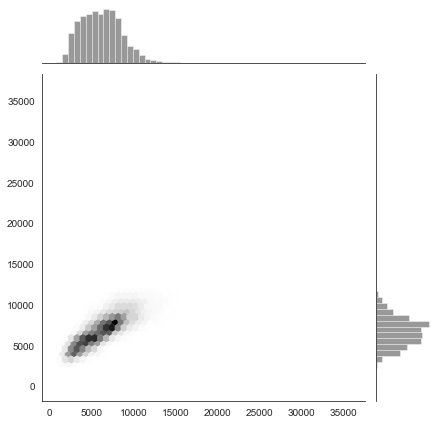

hexScatter post


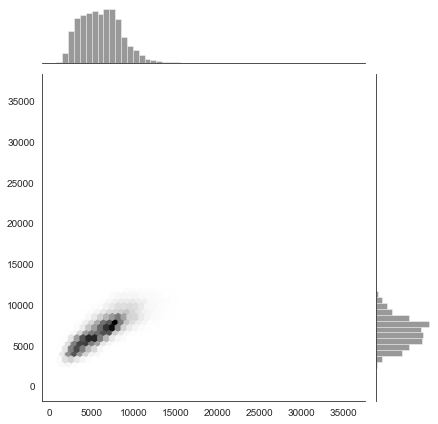

Grouped byIsBadBuypre


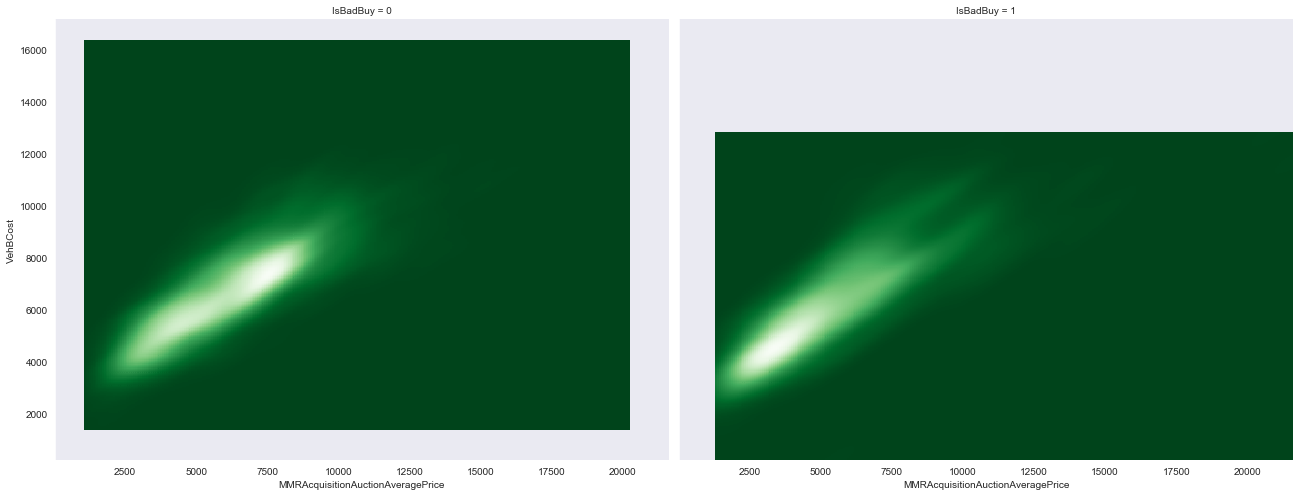

Grouped byIsBadBuypost


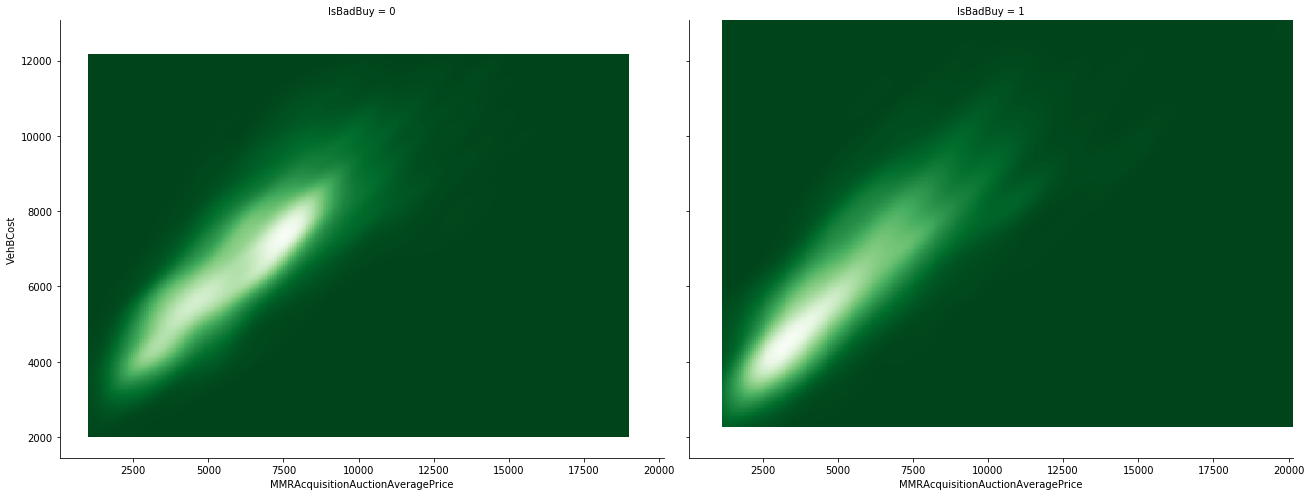







MMRAcquisitionAuctionAveragePrice vs WarrantyCost
hexScatter pre


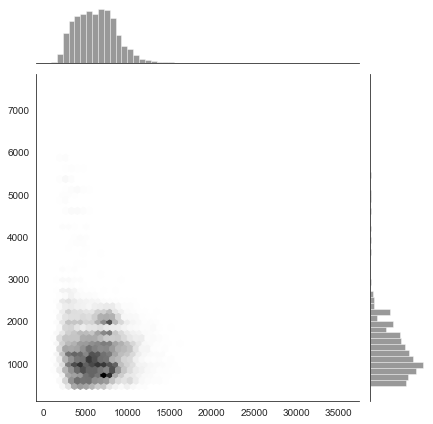

hexScatter post


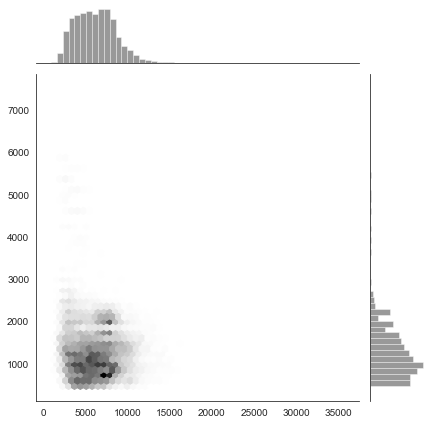

Grouped byIsBadBuypre


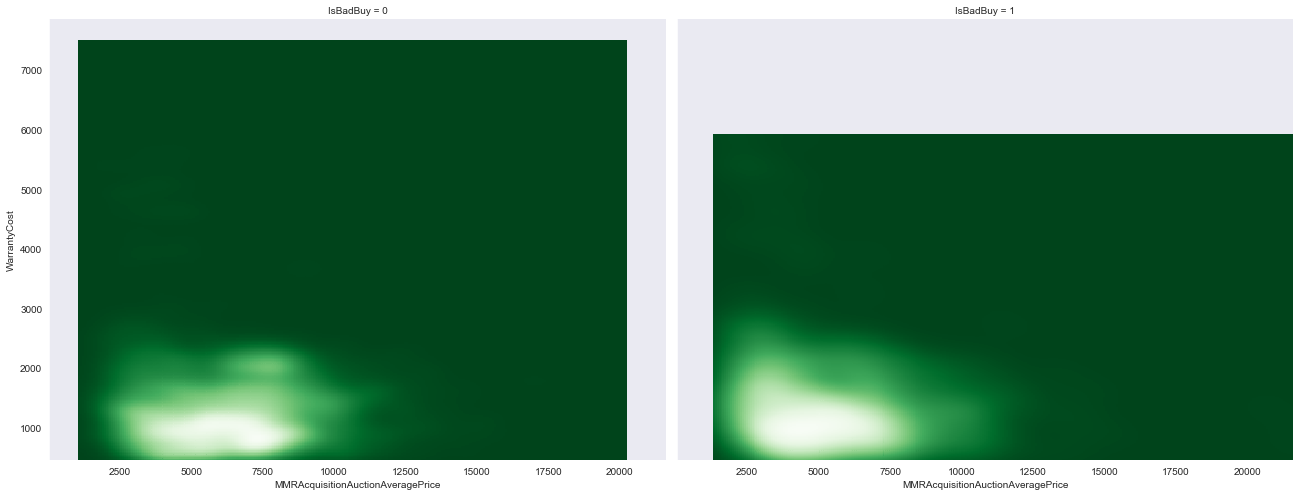

Grouped byIsBadBuypost


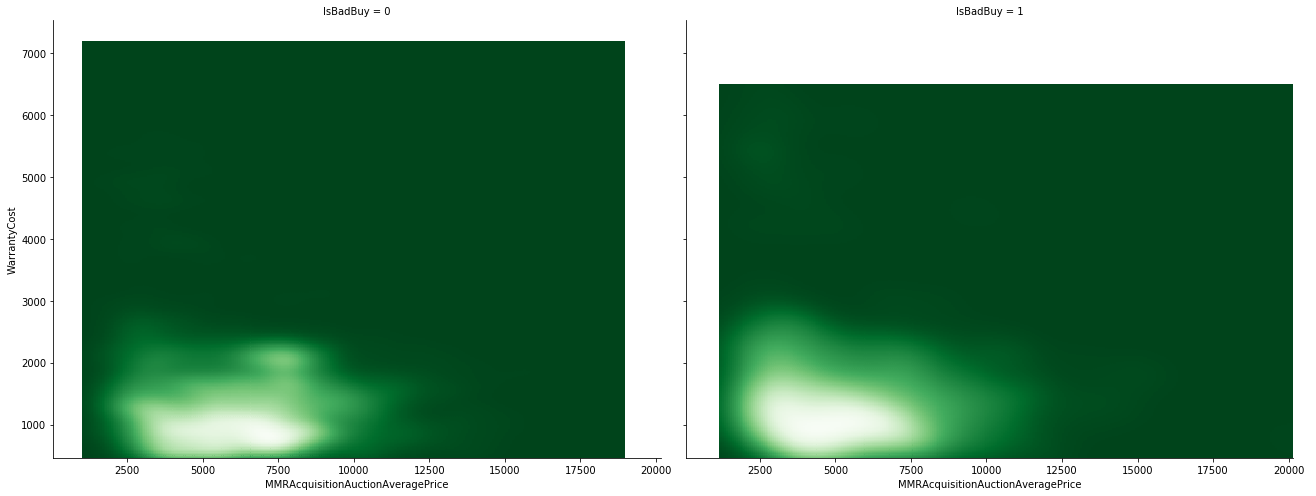







MMRAcquisitionAuctionAveragePrice vs VehOdo
hexScatter pre


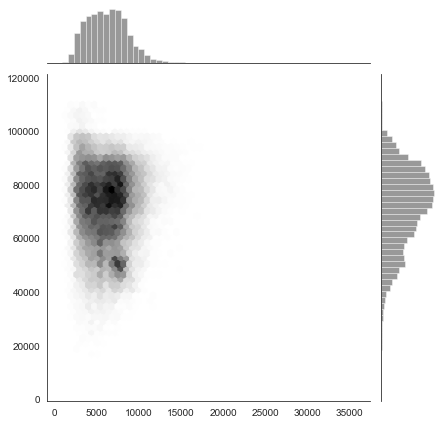

hexScatter post


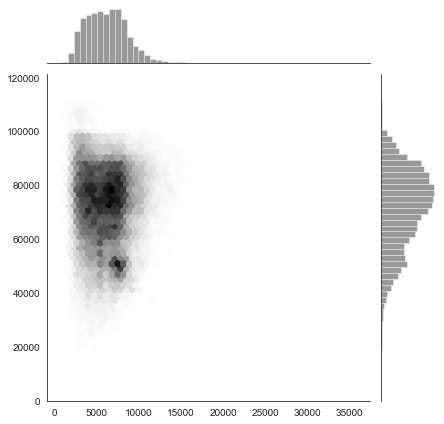

Grouped byIsBadBuypre


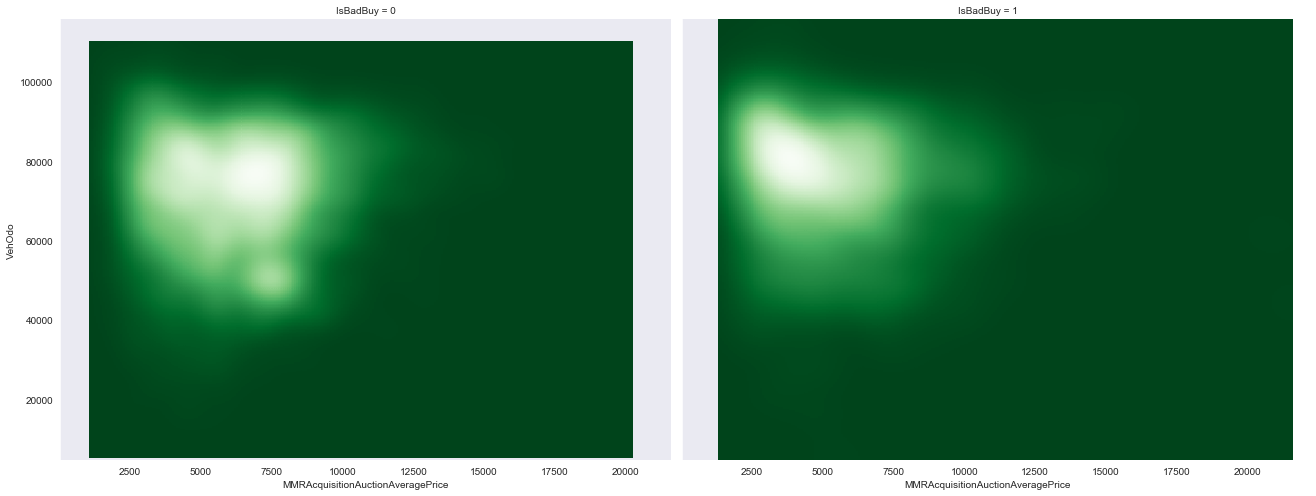

Grouped byIsBadBuypost


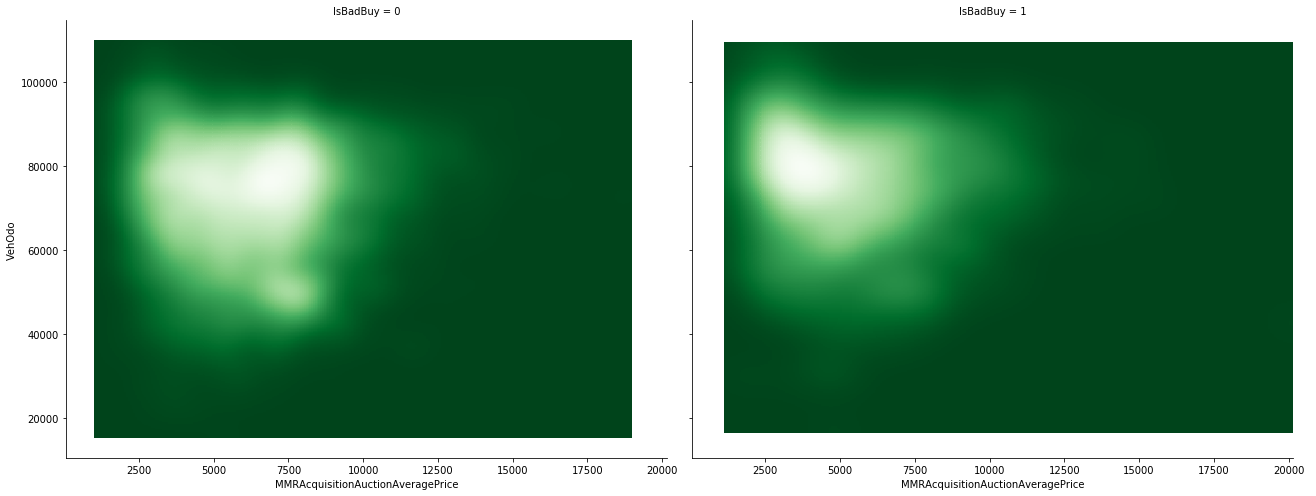







VehBCost vs WarrantyCost
hexScatter pre


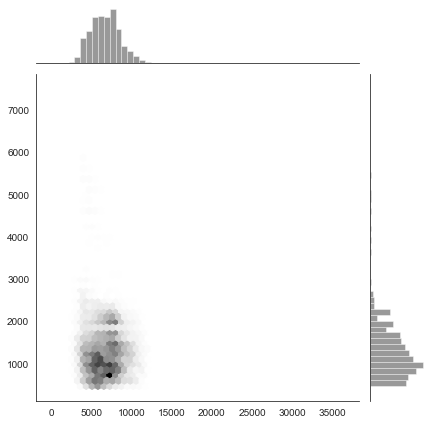

hexScatter post


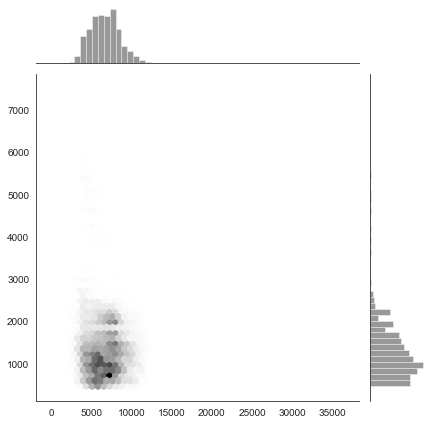

Grouped byIsBadBuypre


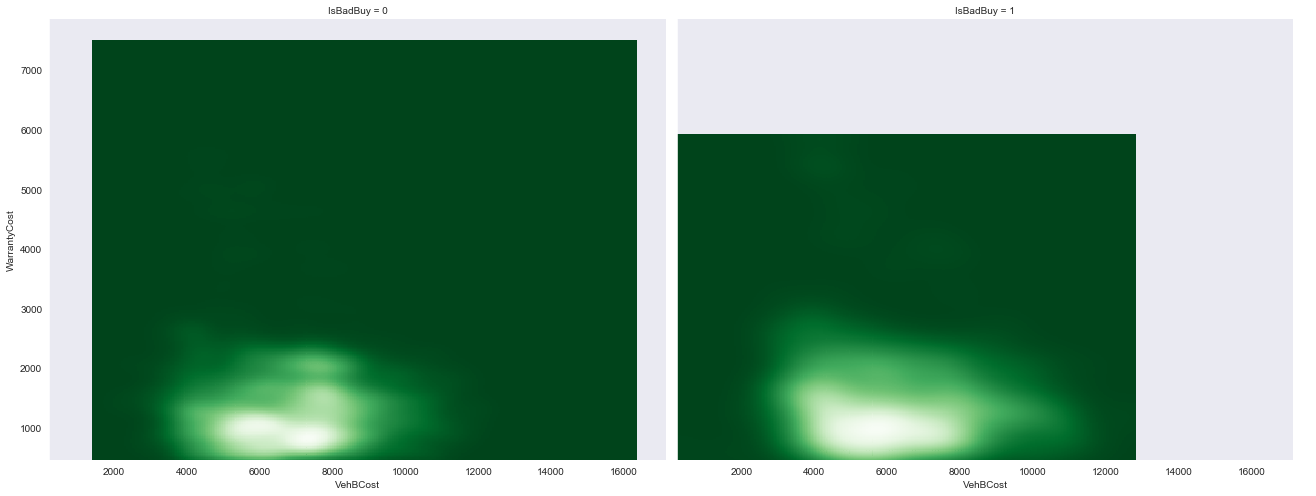

Grouped byIsBadBuypost


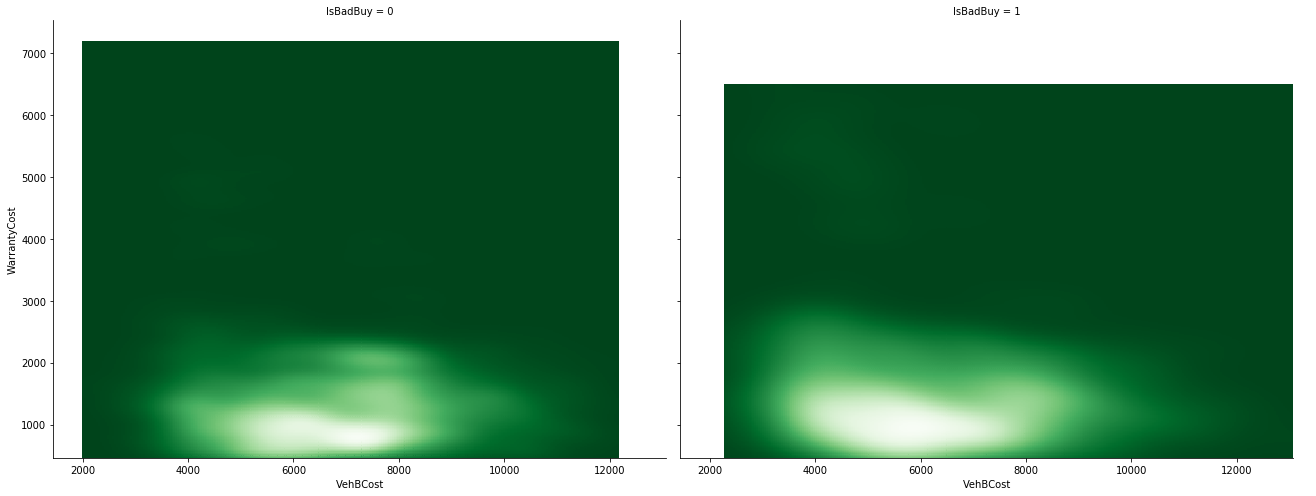







VehBCost vs VehOdo
hexScatter pre


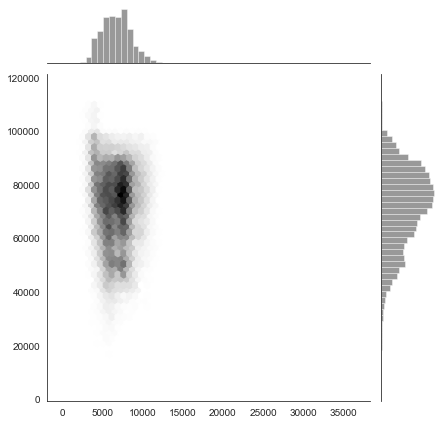

hexScatter post


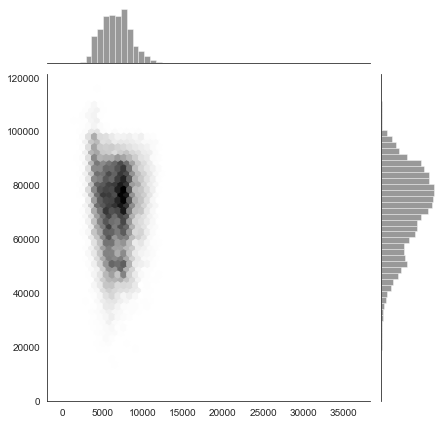

Grouped byIsBadBuypre


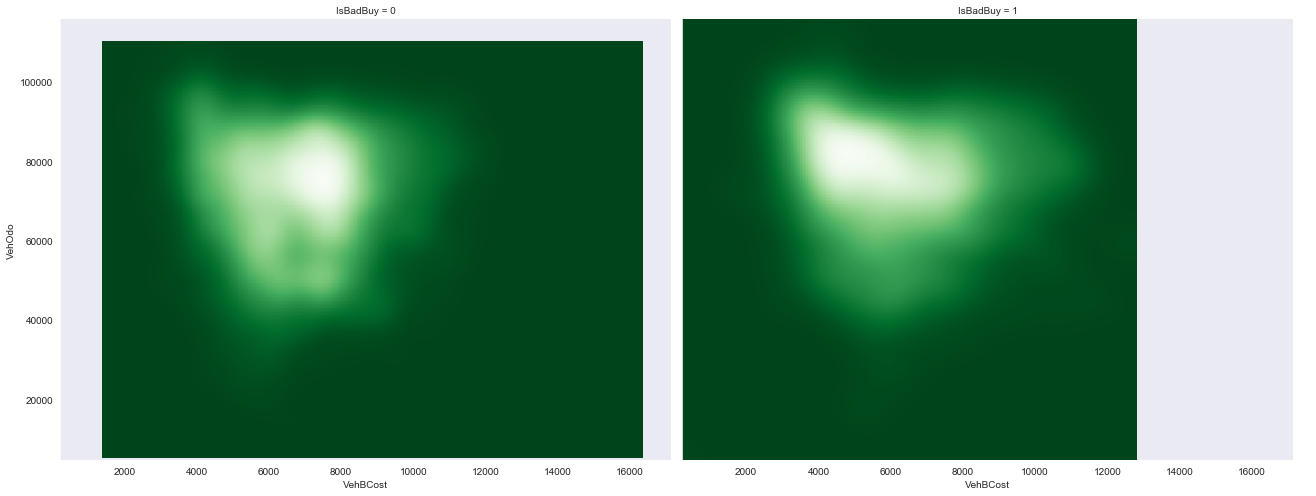

Grouped byIsBadBuypost


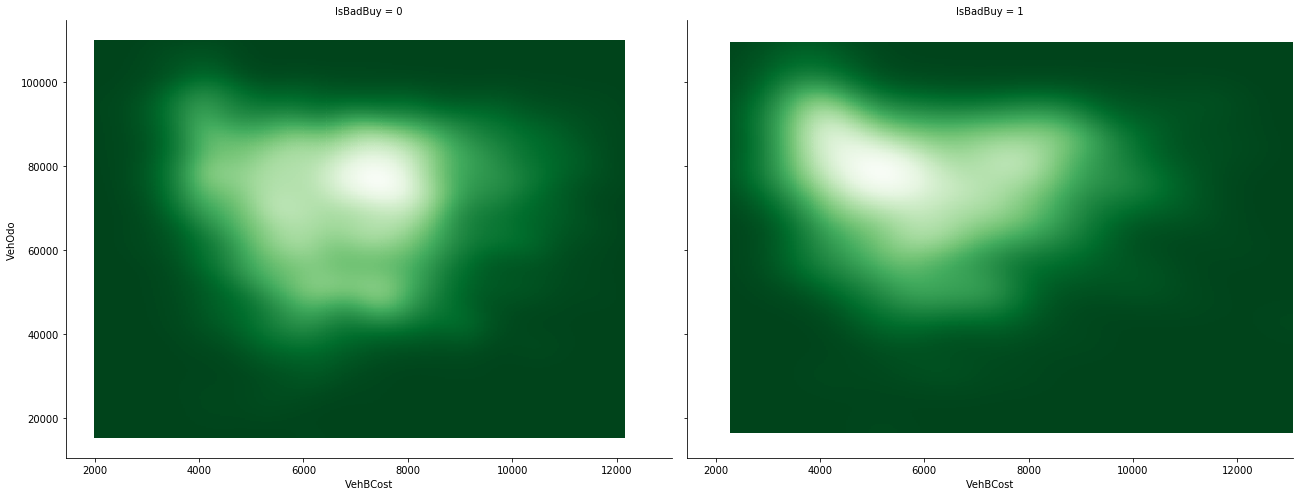







WarrantyCost vs VehOdo
hexScatter pre


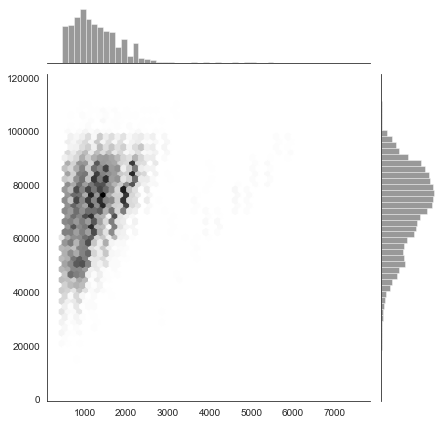

hexScatter post


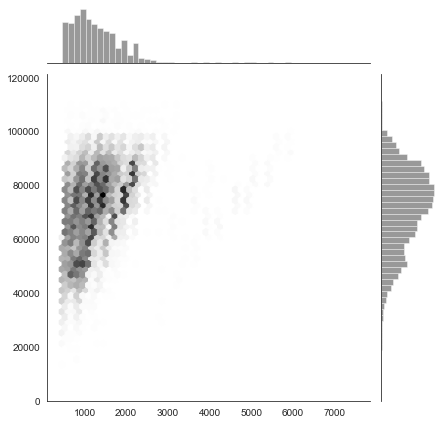

Grouped byIsBadBuypre


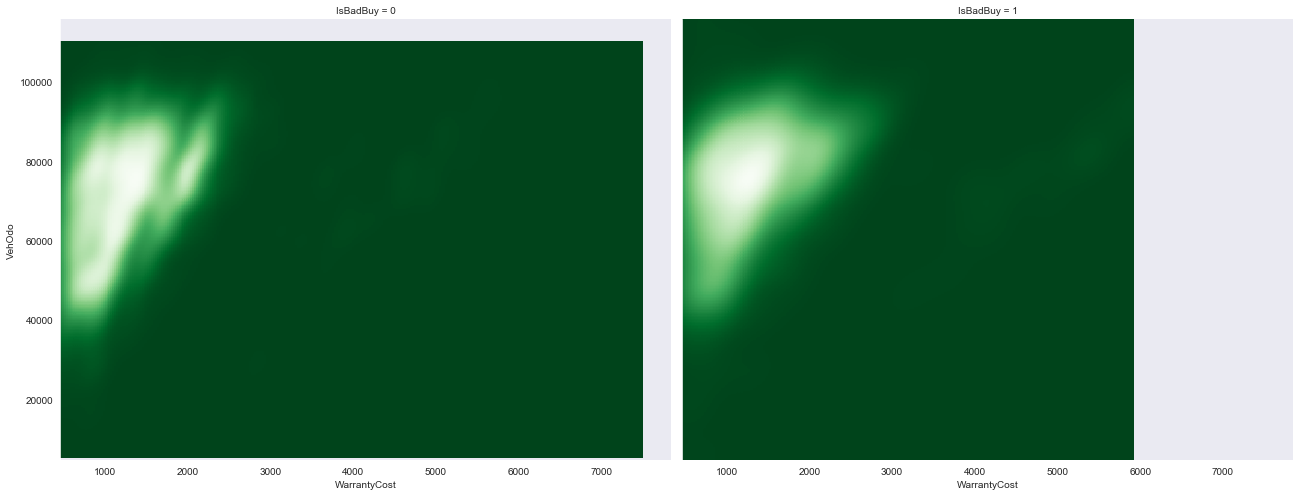

Grouped byIsBadBuypost


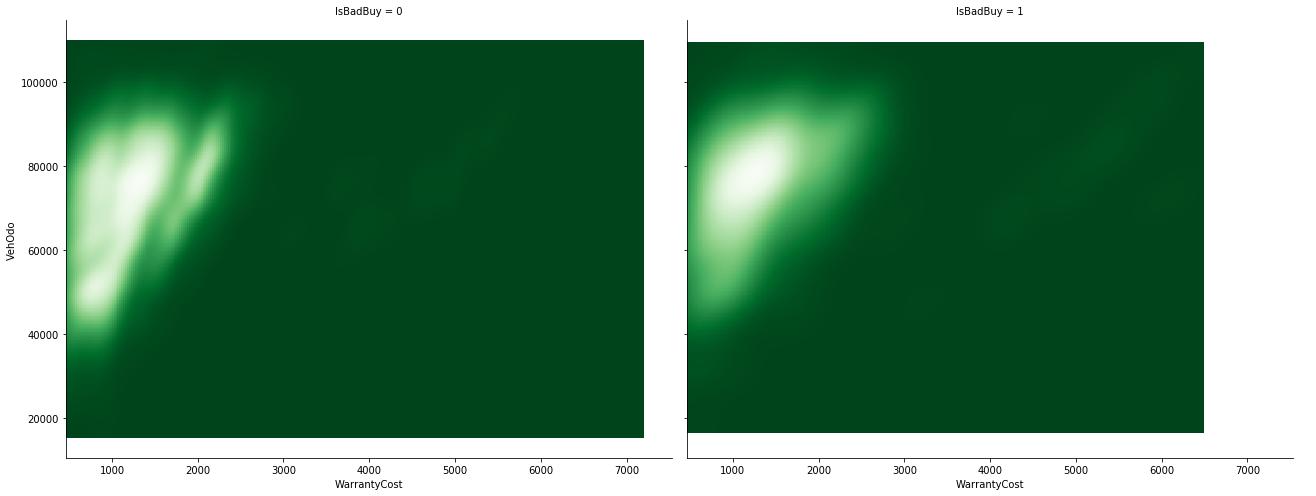

In [5]:
if advanced:
    couples=itertools.combinations(num_catProp, 2)
    def density(x, y, color):
        # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
        nbins=300
        k = stats.gaussian_kde([x,y])
        xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
        zi = k(np.vstack([xi.flatten(), yi.flatten()]))
        plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
    
    for Variable1, Variable2 in couples:
        if Variable1 in pre.columns and Variable2 in pre.columns:
            
            compare= comp and Variable1 in post.columns and Variable2 in post.columns
            print(Variable1+str(' vs ')+Variable2)
            
            if hexPlot:
                print('hexScatter pre')
                
                tmpPre=pre[[Variable1,Variable2]].dropna()
                
                x = tmpPre[Variable1].dropna().to_numpy()
                y = tmpPre[Variable2].dropna().to_numpy()
            
                if len(x)==len(y):
                    with sns.axes_style("white"):
                        sns.jointplot(x=x, y=y, kind="hex", color="k");
                        plt.show()
                
                if compare:
                    print('hexScatter post')
                    
                    tmpPost=post[[Variable1,Variable2]].dropna()
                    
                    x = tmpPost[Variable1].dropna().to_numpy()
                    y = tmpPost[Variable2].dropna().to_numpy()
            
                    if len(x)==len(y):
                        with sns.axes_style("white"):
                            sns.jointplot(x=x, y=y, kind="hex", color="k");
                            plt.show()
                            
            
            if densityByVarGroup:           
                print('Grouped by'+str(VarGroup)+'pre')
                with sns.axes_style("dark"):
                    tmpPre=SamplePre[[Variable1,Variable2, VarGroup]].dropna()
                    g = sns.FacetGrid(tmpPre, col=VarGroup, height=7, aspect=1.3)
                    g.map(density, Variable1, Variable2);
                    g.add_legend();
                    plt.show()
                
                if compare:
                    print('Grouped by'+str(VarGroup)+'post')
                    tmpPost=SamplePost[[Variable1,Variable2, VarGroup]].dropna()
                    g = sns.FacetGrid(tmpPost, col=VarGroup, height=7, aspect=1.3)
                    g.map(density, Variable1, Variable2);
                    g.add_legend();
                    plt.show()
                    
            
            if densityBy2VarGroup:           
                print('Grouped by'+str(VarGroup)+'and'+str(VarGroup2)+'pre')
                with sns.axes_style("dark"):
                    tmpPre=SamplePre[[Variable1,Variable2, VarGroup, VarGroup2]].dropna()
                    g = sns.FacetGrid(tmpPre, col=VarGroup, row=VarGroup2, height=7, aspect=1.3)
                    g.map(density, Variable1, Variable2);
                    g.add_legend();
                    plt.show()
                
                if compare:
                    print('Grouped by '+str(VarGroup)+'and'+str(VarGroup2)+'post')
                    tmpPost=SamplePost[[Variable1,Variable2, VarGroup, VarGroup2]].dropna()
                    g = sns.FacetGrid(tmpPost, col=VarGroup, row=VarGroup2,height=7, aspect=1.3)
                    g.map(density, Variable1, Variable2);
                    g.add_legend();
                    plt.show()
            
            print('\n\n\n\n\n')